# The Spark Foundation - GRIP June 2021

## Task 2 - Prediction Using Unsupervised ML

### Author : Kunal

## Problem Statement :


* From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## Data Collection 

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = data.set_index('Id').rename(columns={'SepalLengthCm': 'Sepal Length',
                                           'SepalWidthCm': 'Sepal Width',
                                           'PetalLengthCm': 'Petal Length',
                                           'PetalWidthCm': 'Petal Width'})
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory analysis

In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking for null values
data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [8]:
# Unique values in 'Species'
data.Species.unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

## Data Visualization

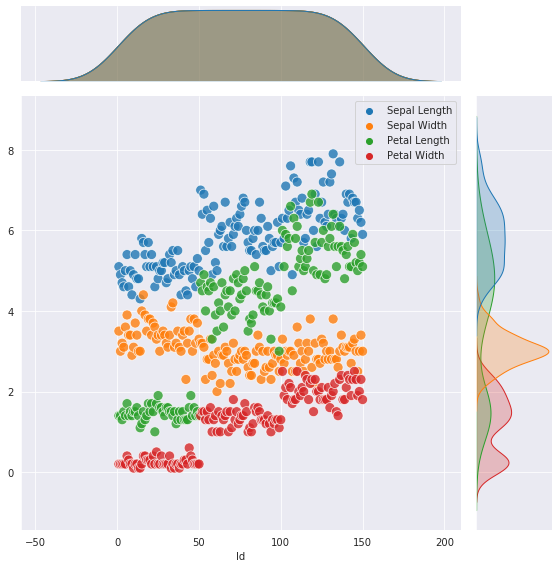

In [9]:
sns.jointplot(data=data, s=100, alpha=0.8, height=8)
plt.show()

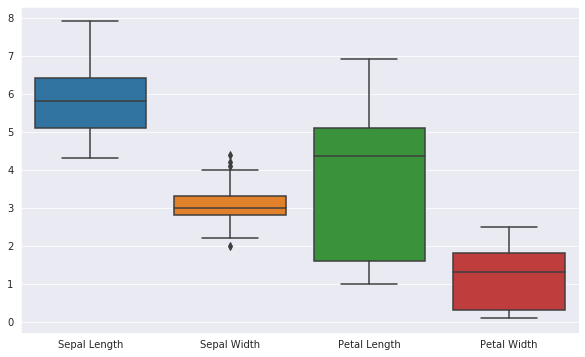

In [10]:
# Distribution of data using Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

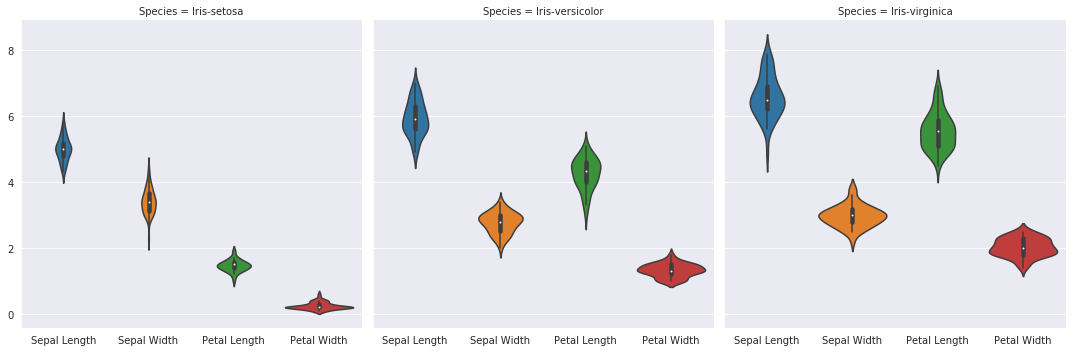

In [11]:
# Plotting by Species using Catplot
sns.catplot(data=data, col='Species', kind='violin')
plt.show()

## Correlation of Data

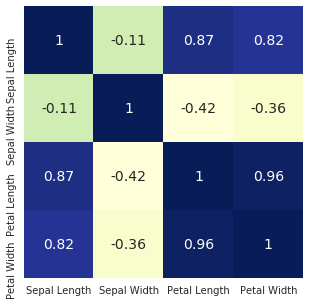

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, 
            cbar=False, annot_kws={'size': 14})
plt.show()

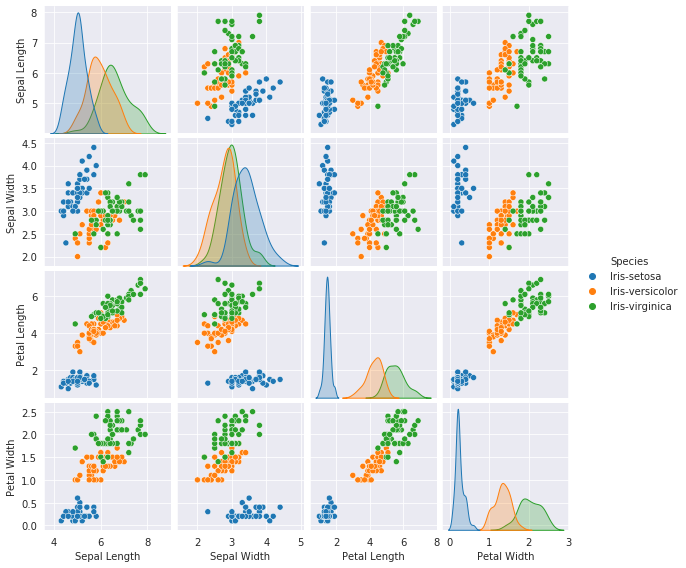

In [13]:
sns.pairplot(data=data, hue='Species', height=2)
plt.show()

## K-Means Clustering

### Preparing data


In [14]:
# Petal-Length & Petal-Width are taken
X = data.iloc[:, [2,3]].values
y = data['Species'].map({'Iris-setosa': 0, 'Iris-virginica':1, 'Iris-versicolor':2}).values

In [15]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (150, 2)
Shape of y: (150,)


### Elbow Method

In [16]:
wcss = []
for i in range(1,11):
    kmeans_c = KMeans(n_clusters=i, init='k-means++', 
                      max_iter = 300, n_init = 10, random_state=0)
    kmeans_c.fit(X)
    wcss.append(kmeans_c.inertia_)
    print(f'wcss {i}: {kmeans_c.inertia_}')

wcss 1: 550.6434666666667
wcss 2: 86.40394533571003
wcss 3: 31.38775897435898
wcss 4: 19.49940089968511
wcss 5: 13.933308757908758
wcss 6: 11.107174889156013
wcss 7: 9.22580873015873
wcss 8: 7.69668529657477
wcss 9: 6.472894541406307
wcss 10: 5.67856103236538


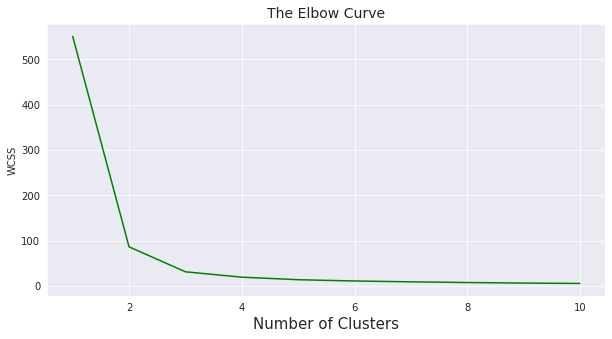

In [17]:
# Plotting Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='green')
plt.title('The Elbow Curve', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('WCSS')
plt.show()

### Making prediction

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', 
                max_iter = 300, n_init = 10, random_state=0)
y_means = kmeans.fit_predict(X)

In [19]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Plotting Clustors

In [24]:
# Cluster Center values
kmeans.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

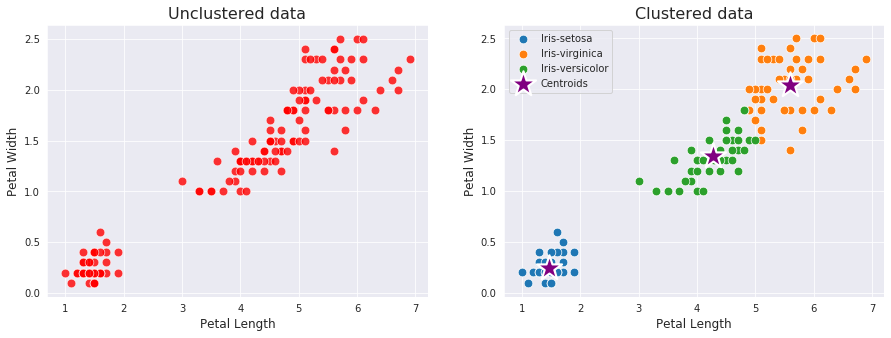

In [25]:
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Unclustered data', fontsize=16)
ax[0].set_xlabel('Petal Length', fontsize=12)
ax[0].set_ylabel('Petal Width', fontsize=12)
sns.scatterplot(data['Petal Length'], data['Petal Width'], 
                s=75, color='red', alpha=0.8, ax=ax[0])
ax[1].set_title('Clustered data', fontsize=16)
ax[1].set_xlabel('Petal Length', fontsize=12)
ax[1].set_ylabel('Petal Width', fontsize=12)
for i in range(0, 3):
    sns.scatterplot(X[y_means == i, 0], X[y_means == i, 1], s=75, label=species[i], ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                s=700, color='purple', label='Centroids', marker='*', ax=ax[1])
plt.show()

## Task 2 Completed